In [1]:
from lcapy import Circuit, j, omega, s
cct = Circuit("""
Vi 1 0_1 step; down
R 1 2; right, size=1.5
C 2 0; down
W 0_1 0; right
W 0 0_2; right, size=0.5
P1 2_2 0_2; down
W 2 2_2;right, size=0.5""")


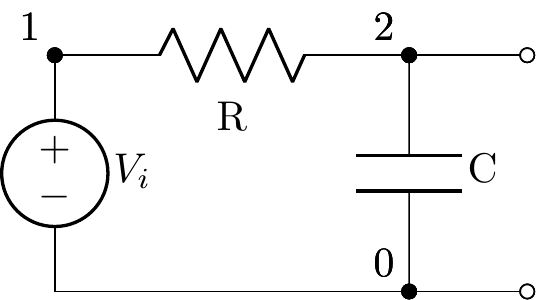

In [2]:
cct.draw()

In [3]:
H = (cct.C.V(s) / cct.Vi.V(s)).simplify()

In [4]:
H(j * omega)

     1     
───────────
ⅉ⋅C⋅R⋅ω + 1

In [5]:
H(j * omega).rationalize_denominator()

-ⅉ⋅C⋅R⋅ω + 1
────────────
 2  2  2    
C ⋅R ⋅ω  + 1

In [6]:
H(j * omega).real_imag

    ⅉ⋅C⋅R⋅ω           1      
- ──────────── + ────────────
   2  2  2        2  2  2    
  C ⋅R ⋅ω  + 1   C ⋅R ⋅ω  + 1

In [7]:
H(j * omega).magnitude


        1        
─────────────────
   ______________
  ╱  2  2  2     
╲╱  C ⋅R ⋅ω  + 1 

In [8]:
H(j * omega).phase_degrees

-180⋅aₜₐₙ(C⋅R⋅ω) 
─────────────────
        π        

In [9]:
H1 = H.subs('C',1e-6).subs('R',1e3)
H1(j * omega)

   1    
────────
ⅉ⋅ω     
──── + 1
1000    

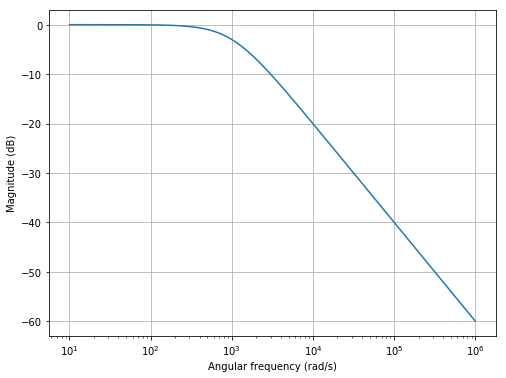

In [10]:
from numpy import logspace
w = logspace(1, 6, 500)
%matplotlib inline
ax = H1(j * omega).dB.plot(w, log_frequency=True)

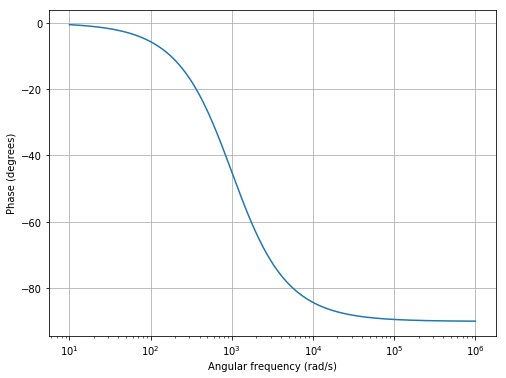

In [11]:
ax = H1(j * omega).phase_degrees.plot(w, log_frequency=True)